In [3]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [20]:
mnist = tf.keras.datasets.mnist #28X28 images of handwritten digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) #normalize pixel values on scale of 1 for training data --- this makes things run faster
x_test = tf.keras.utils.normalize(x_test, axis=1) #normalize pixel values on scale of 1 for test data 

#building layers of network
model = tf.keras.models.Sequential() #defining network model - sequential 
model.add(tf.keras.layers.Flatten()) # flattening input array to a 1D array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#function for compiling model
model.compile(optimizer='adam', #optimizer function for regression parameters - like gradient descent
              loss='sparse_categorical_crossentropy', #loss = error from labels. sparse since outputs are sparse digits - another type is binary which is for binary outputs 
              metrics = ['accuracy'])

#function for training model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3151 - accuracy: 0.9116
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1429 - accuracy: 0.9580
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0966 - accuracy: 0.9712


In [21]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 761us/step - loss: 0.1061 - accuracy: 0.9680
0.1061246246099472 0.9679999947547913


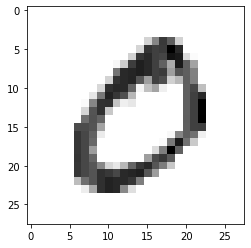

0


In [36]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = plt.cm.binary) #input of training data
plt.show()
print(y_train[1]) #output value of training data

In [22]:
#saving the built model
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [25]:
#opening/loading the model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [30]:
#running prediction on test data
predictions = new_model.predict(x_test)

In [31]:
print(predictions)

[[2.01849502e-07 2.54064880e-09 4.72980646e-05 ... 9.98992860e-01
  9.90663693e-07 8.04525655e-07]
 [1.17850595e-05 3.37315141e-04 9.98917818e-01 ... 8.56435270e-11
  4.36551090e-06 2.67870431e-11]
 [2.35377115e-06 9.98351455e-01 2.42151771e-04 ... 1.23719714e-04
  6.43847103e-04 3.36859375e-06]
 ...
 [2.80448855e-08 2.06899017e-07 2.85328468e-07 ... 3.61949133e-05
  6.28258393e-04 2.88340612e-04]
 [8.72458259e-06 2.31115837e-06 2.59983977e-07 ... 6.21849767e-06
  9.81552643e-04 1.69295546e-07]
 [1.05177514e-06 2.97911695e-09 1.15886974e-06 ... 6.17330020e-10
  3.80991452e-08 1.18903187e-09]]


In [32]:
import numpy as np

print(np.argmax(predictions[0]))

7


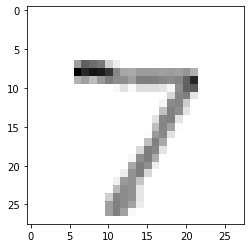

In [35]:
#check if above prediction is right:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()